In [331]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torchmetrics.functional as metrics
import re, os
from sklearn.metrics import classification_report

In [332]:
train_path = '../data/lang_data/train'
test_path = '../data/lang_data/test'

count = 0

def getFiles(dir, extension):
    for d in os.listdir('../data/'+dir):
        print(d)
        global count
        count+=1
        print(count)

getFiles('lang_data/train','txt')

en-6.txt
1
en-10.txt
2
tl-20.txt
3
en-7.txt
4
en-5.txt
5
en-4.txt
6
en-1.txt
7
en-3.txt
8
fr-8.txt
9
tl-18.txt
10
fr-10.txt
11
tl-19.txt
12
fr-9.txt
13
en-2.txt
14
id-20.txt
15
id-19.txt
16
id-18.txt
17
id-15.txt
18
id-14.txt
19
id-16.txt
20
id-17.txt
21
id-13.txt
22
id-12.txt
23
id-11.txt
24
fr-4.txt
25
tl-14.txt
26
tl-15.txt
27
fr-5.txt
28
fr-7.txt
29
tl-17.txt
30
tl-16.txt
31
fr-6.txt
32
en-9.txt
33
fr-2.txt
34
tl-12.txt
35
tl-13.txt
36
fr-3.txt
37
en-8.txt
38
fr-1.txt
39
tl-11.txt
40


In [333]:
ord('A'), ord('Z'), ord('z')

(65, 90, 122)

In [334]:
alNP = np.zeros([40,27]) 
alNP.shape

alNP[0][0]

0.0

In [335]:
# count = 0
# for d in os.listdir('../data/lang_data/train'):
#     print((d.split('-'))[0])
#     with open("../data/lang_data/train/"+d, "r", encoding="utf-8") as f:
#         for line in f: 
#             for c in line:
#                 if c.isalpha():
#                     c = c.upper()
#                     if 65 <= ord(c) <= 90: 
#                         alNP[count][ord(c) - 65] += 1  
#                         print(alNP[count]) 
#                         # count+=1
#                         # alNP[count][-1]==(d.split('-'))[0]

In [336]:
import os

alNP = [[0] * 27 for _ in range(40)]
# print(type(alNP))
count = 0
for d in os.listdir('../data/lang_data/train'):
    print(d.split('-')[0])
    with open(os.path.join('../data/lang_data/train', d), "r", encoding="utf-8") as f:
        for line in f:
            for c in line:
                if c.isalpha():
                    c = c.upper()
                    if 'A' <= c <= 'Z':
                        alNP[count][ord(c) - ord('A')] += 1
                        alNP[count][-1]=(d.split('-'))[0]
    print(alNP[count])
    count += 1

altest = [[0] * 27 for _ in range(40)]
count = 0
for d in os.listdir('../data/lang_data/train'):
    # print(d.split('-')[0])
    with open(os.path.join('../data/lang_data/train', d), "r", encoding="utf-8") as f:
        for line in f:
            for c in line:
                if c.isalpha():
                    c = c.upper()
                    if 'A' <= c <= 'Z':
                        altest[count][ord(c) - ord('A')] += 1
                        altest[count][-1]=(d.split('-'))[0]
    # print(altest[count])
    count += 1

en
[998, 167, 441, 419, 1524, 235, 234, 455, 929, 10, 58, 518, 324, 887, 1010, 222, 13, 952, 870, 1087, 299, 276, 164, 28, 190, 10, 'en']
en
[1856, 238, 856, 638, 2030, 408, 306, 756, 1574, 20, 84, 862, 525, 1505, 1388, 407, 34, 1254, 1324, 1689, 536, 158, 286, 41, 302, 107, 'en']
tl
[1469, 165, 142, 269, 466, 42, 240, 49, 548, 17, 107, 367, 173, 834, 491, 224, 13, 286, 472, 335, 202, 35, 42, 3, 246, 22, 'tl']
en
[2639, 531, 1369, 1275, 3863, 734, 615, 1185, 2376, 34, 143, 1452, 836, 2330, 2263, 655, 16, 2256, 2091, 2456, 892, 403, 441, 62, 525, 45, 'en']
en
[337, 93, 142, 181, 645, 93, 93, 260, 297, 15, 27, 181, 132, 284, 302, 86, 2, 331, 272, 436, 114, 49, 109, 14, 68, 3, 'en']
en
[383, 147, 159, 210, 642, 89, 125, 313, 346, 8, 69, 238, 114, 311, 465, 89, 2, 314, 389, 497, 129, 27, 104, 32, 93, 9, 'en']
en
[349, 59, 210, 212, 484, 72, 88, 201, 340, 8, 25, 247, 121, 356, 412, 76, 0, 357, 282, 370, 119, 45, 65, 3, 92, 2, 'en']
en
[259, 44, 165, 118, 434, 53, 91, 85, 342, 9, 6, 206, 81,

In [337]:
alDF = pd.DataFrame(alNP)
featureDF = alDF.iloc[:,:26]
targetSR = alDF.iloc[:,26]
featureDF

altest = pd.DataFrame(altest)
testDF = alDF.iloc[:,:26]
testtargetSR = alDF.iloc[:,26]
testDF

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,998,167,441,419,1524,235,234,455,929,10,...,13,952,870,1087,299,276,164,28,190,10
1,1856,238,856,638,2030,408,306,756,1574,20,...,34,1254,1324,1689,536,158,286,41,302,107
2,1469,165,142,269,466,42,240,49,548,17,...,13,286,472,335,202,35,42,3,246,22
3,2639,531,1369,1275,3863,734,615,1185,2376,34,...,16,2256,2091,2456,892,403,441,62,525,45
4,337,93,142,181,645,93,93,260,297,15,...,2,331,272,436,114,49,109,14,68,3
5,383,147,159,210,642,89,125,313,346,8,...,2,314,389,497,129,27,104,32,93,9
6,349,59,210,212,484,72,88,201,340,8,...,0,357,282,370,119,45,65,3,92,2
7,259,44,165,118,434,53,91,85,342,9,...,6,195,318,293,105,68,43,2,65,2
8,585,127,321,412,1266,105,109,116,695,35,...,47,661,536,492,344,122,6,41,40,16
9,4100,376,45,228,532,5,1632,201,1256,32,...,1,480,845,1064,621,19,255,1,352,1


In [338]:
targetSR.unique()

array(['en', 'tl', 'fr', 'id'], dtype=object)

In [339]:
targetSR =targetSR.replace({'en':1,'tl':2,'fr':3,'id':4})
testtargetSR =testtargetSR.replace({'en':1,'tl':2,'fr':3,'id':4})
targetSR, testtargetSR

(0     1
 1     1
 2     2
 3     1
 4     1
 5     1
 6     1
 7     1
 8     3
 9     2
 10    3
 11    2
 12    3
 13    1
 14    4
 15    4
 16    4
 17    4
 18    4
 19    4
 20    4
 21    4
 22    4
 23    4
 24    3
 25    2
 26    2
 27    3
 28    3
 29    2
 30    2
 31    3
 32    1
 33    3
 34    2
 35    2
 36    3
 37    1
 38    3
 39    2
 Name: 26, dtype: int64,
 0     1
 1     1
 2     2
 3     1
 4     1
 5     1
 6     1
 7     1
 8     3
 9     2
 10    3
 11    2
 12    3
 13    1
 14    4
 15    4
 16    4
 17    4
 18    4
 19    4
 20    4
 21    4
 22    4
 23    4
 24    3
 25    2
 26    2
 27    3
 28    3
 29    2
 30    2
 31    3
 32    1
 33    3
 34    2
 35    2
 36    3
 37    1
 38    3
 39    2
 Name: 26, dtype: int64)

In [340]:
alDF =alDF.replace({'en':1,'tl':2,'fr':3,'id':4})
altest =altest.replace({'en':1,'tl':2,'fr':3,'id':4})


en = alDF[alDF.iloc[:,26]==1].reset_index()
entest = altest[altest.iloc[:,26]==1].reset_index()
en

,index,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,0,998,167,441,419,1524,235,234,455,929,...,952,870,1087,299,276,164,28,190,10,1
1,1,1856,238,856,638,2030,408,306,756,1574,...,1254,1324,1689,536,158,286,41,302,107,1
2,3,2639,531,1369,1275,3863,734,615,1185,2376,...,2256,2091,2456,892,403,441,62,525,45,1
3,4,337,93,142,181,645,93,93,260,297,...,331,272,436,114,49,109,14,68,3,1
4,5,383,147,159,210,642,89,125,313,346,...,314,389,497,129,27,104,32,93,9,1
5,6,349,59,210,212,484,72,88,201,340,...,357,282,370,119,45,65,3,92,2,1
6,7,259,44,165,118,434,53,91,85,342,...,195,318,293,105,68,43,2,65,2,1
7,13,706,167,255,326,1149,146,262,230,632,...,756,601,652,257,115,117,17,90,5,1
8,32,5662,906,2252,2611,8499,1518,1155,3509,5294,...,4425,4934,5785,2504,811,1157,81,946,79,1
9,37,3977,700,1321,1834,5180,924,689,2141,3567,...,2526,3219,3598,1428,391,740,111,659,19,1


In [341]:
tl = alDF[alDF.iloc[:,26]==2].reset_index()
fr = alDF[alDF.iloc[:,26]==3].reset_index()
id = alDF[alDF.iloc[:,26]==4].reset_index()

tltest = altest[altest.iloc[:,26]==2].reset_index()
frtest = altest[altest.iloc[:,26]==3].reset_index()
idtest = altest[altest.iloc[:,26]==4].reset_index()

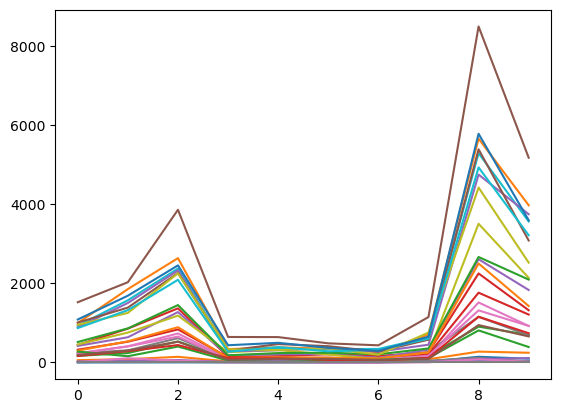

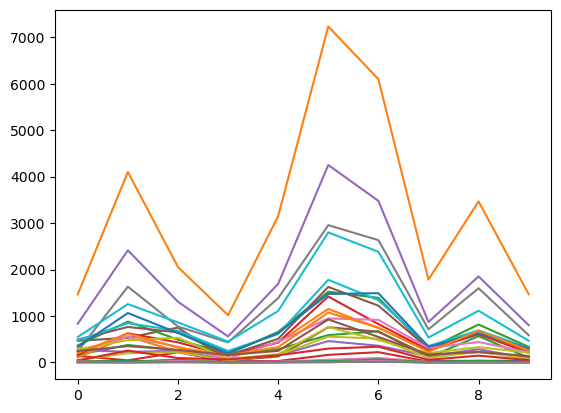

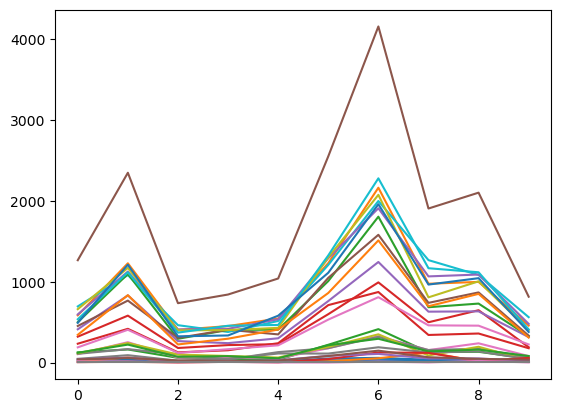

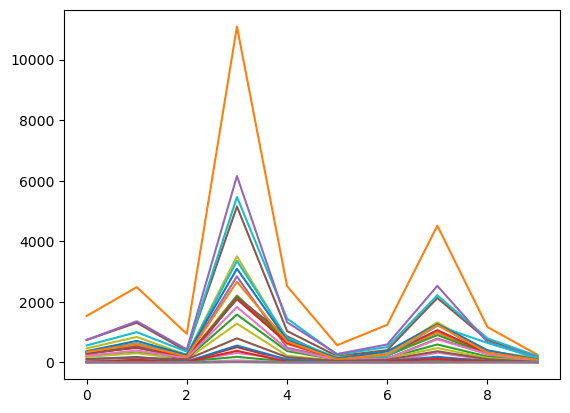

In [342]:
import matplotlib.pyplot as plt
plt.plot(en)
plt.show()
plt.plot(tl)
plt.show()
plt.plot(fr)
plt.show()
plt.plot(id)
plt.show()

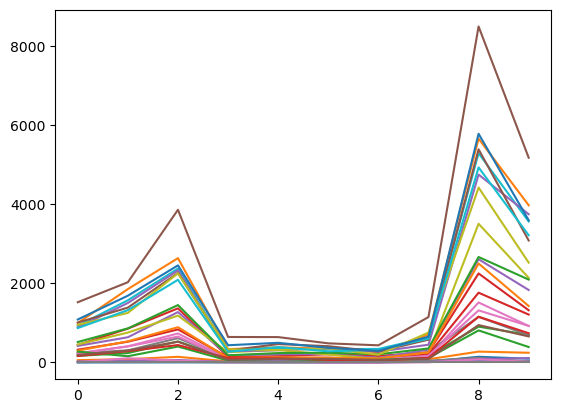

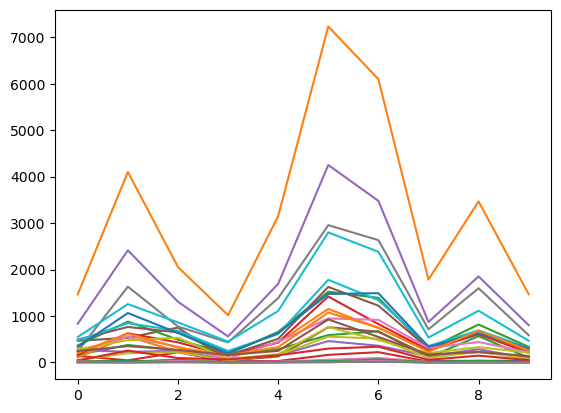

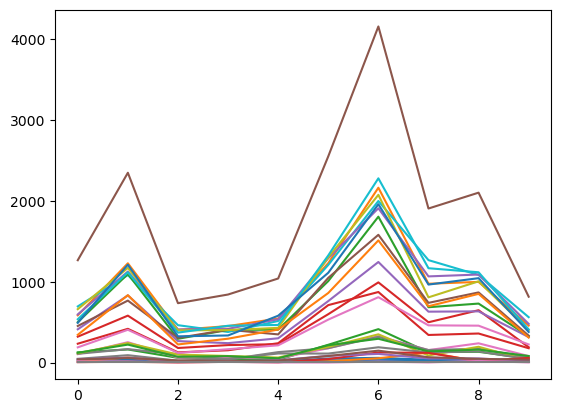

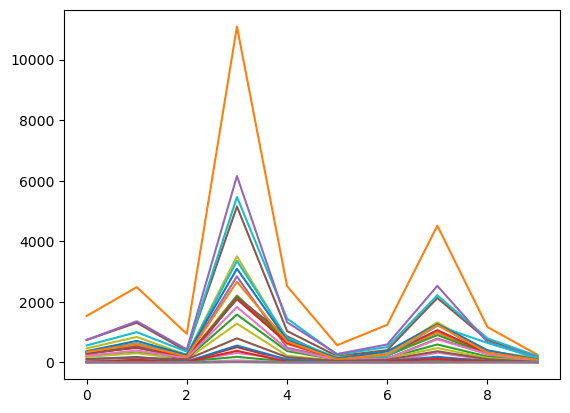

In [343]:
plt.plot(entest)
plt.show()
plt.plot(tltest)
plt.show()
plt.plot(frtest)
plt.show()
plt.plot(idtest)
plt.show()

In [344]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
print(f"train data => {featureDF.shape}, {targetSR.shape}")
print(f"test data => {testDF.shape}, {testtargetSR.shape}")



train data => (40, 26), (40,)
test data => (40, 26), (40,)


In [345]:
class DLDataset(Dataset):
    
    # 초기화 함수
    def __init__(self,x_data,y_data): 
        super().__init__()
        x_data = x_data.values if isinstance(x_data, pd.DataFrame) else x_data
        y_data = y_data.values if isinstance(y_data, pd.DataFrame) else y_data
        
        self.feature = torch.FloatTensor(x_data)
        self.target = torch.LongTensor(y_data)
        
    def __len__(self):
        return self.target.shape[0]
        
    def __getitem__(self,index):
        return self.feature[index],self.target[index]

In [346]:
from torch.utils.data import random_split

seed = torch.Generator().manual_seed(1)

train_data, valid_data = random_split(DLDataset(featureDF, targetSR), [0.7,0.3], generator=seed)
test_data = DLDataset(testDF, testtargetSR)

In [347]:
trainDL = DataLoader(train_data, drop_last=False, shuffle=True)
validDL = DataLoader(valid_data, shuffle=True) 
testDL = DataLoader(test_data, shuffle=True) 

In [348]:
import torch.nn as nn

class Model1(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.input_layer = nn.Linear(in_dim, 50)
        self.relu = nn.ReLU()  
        self.hidden_layer = nn.Linear(50, 30) 
        self.relu = nn.ReLU()  
        self.output_layer = nn.Linear(30, out_dim) 

    def forward(self, x):
        y = self.input_layer(x)
        y = self.relu(y)        
        y = self.hidden_layer(y) 
        y = self.relu(y)         
        y = self.output_layer(y) 
        
        return y

In [349]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR,ReduceLROnPlateau

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

EPOCHS = 500

IN_DIM = 26
OUT_DIM = 26

model = Model1(IN_DIM, OUT_DIM).to(DEVICE)

LOSS_FUNCTION = nn.CrossEntropyLoss().to(DEVICE)

OPTIMIZER = optim.Adam(model.parameters())

SCHEDULERS = ReduceLROnPlateau(OPTIMIZER, mode = 'min', patience = 5, verbose = True)

/Users/sml/anaconda3/envs/Torch_PY38/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [350]:
def training(dataLoader):
    
    model.train()
    train_report=[[], []]
    for (feature, target) in dataLoader:

        feature, target = feature.to(DEVICE), target.to(DEVICE)
        
        # 학습
        pre_target = model(feature)
        
        # 손실계산
        loss = LOSS_FUNCTION(pre_target, target)
        train_report[0].append(loss)
  
        # 성능 평가
        acc = metrics.accuracy(pre_target.argmax(dim=1), target, task = 'multiclass',num_classes=4)
        train_report[1].append(acc)
        
        # W,b업데이트
        OPTIMIZER.zero_grad()
        loss.backward()
        OPTIMIZER.step()

    loss_score = sum(train_report[0])/len(train_report[0])
    acc_score = sum(train_report[1])/len(train_report[1])
    print(f'[Train loss] ==> {loss_score}    [Train Accuracy] ==> {acc_score}')
    return loss_score, acc_score

In [351]:
training(trainDL)

[Train loss] ==> 32.40424346923828    [Train Accuracy] ==> 0.0714285746216774


(tensor(32.4042, grad_fn=<DivBackward0>), tensor(0.0714))

In [352]:
def validating(dataLoader):
    
    model.eval()
    
    with torch.no_grad():
        test_report=[[], []]
        for (feature, target)  in dataLoader:
            # 배치크기만큼의 학습 데이터 준비
            feature, target = feature.to(DEVICE), target.to(DEVICE)
            
            # 학습
            pre_target = model(feature)
            
            # 손실계산
            loss = LOSS_FUNCTION(pre_target, target)
            test_report[0].append(loss)
      
            # 성능 평가
            acc = metrics.accuracy(pre_target.argmax(dim=1), target, task = 'multiclass',num_classes=4)
            test_report[1].append(acc)
    
    loss_score = sum(test_report[0])/len(test_report[0])
    acc_score = sum(test_report[1])/len(test_report[1])

    # print(f'[Test loss] ==> {loss_score}    [Test Accuracy] ==> {acc_score}')
    return loss_score, acc_score

In [353]:
validating(validDL)

(tensor(17.0922), tensor(0.2500))

In [354]:
ADAMLIST = [[],[],[],[]]

EPOCHS = 30

min_loss = 100.0  # 초기 최소 손실 설정
cnt = 0

for eps in range(EPOCHS):
    print(f'[{eps+1}/{EPOCHS}]')
    
    # 학습
    train_loss, train_acc = training(trainDL)
    
    # 검증
    val_loss, val_acc = validating(validDL)
    
    # 최소 손실 업데이트
    if val_loss < min_loss:
        min_loss = val_loss
        cnt = 0
        torch.save(model.state_dict(), "my_trained_model.pth")
    else:
        cnt += 1
        
    ADAMLIST[0].append(train_loss)
    ADAMLIST[1].append(train_acc)
    ADAMLIST[2].append(val_loss)
    ADAMLIST[3].append(val_acc)
    
    # 조기 종료 기능 => 조건 : val_loss가 지정된 횟수 이상 개선이 안되면 학습 종료
    if SCHEDULERS.num_bad_epochs >= SCHEDULERS.patience or cnt >= 10:
        print(f"Early stopping at epoch {eps}")
        break

[1/30]
[Train loss] ==> 9.285950660705566    [Train Accuracy] ==> 0.3928571343421936
[2/30]
[Train loss] ==> 6.820968151092529    [Train Accuracy] ==> 0.5357142686843872
[3/30]
[Train loss] ==> 0.9893733263015747    [Train Accuracy] ==> 0.8928571343421936
[4/30]
[Train loss] ==> 0.2221260964870453    [Train Accuracy] ==> 0.8928571343421936
[5/30]
[Train loss] ==> 0.18121042847633362    [Train Accuracy] ==> 0.9285714030265808
[6/30]
[Train loss] ==> 0.3910399377346039    [Train Accuracy] ==> 0.9642857313156128
[7/30]
[Train loss] ==> 0.0866464227437973    [Train Accuracy] ==> 0.9642857313156128
[8/30]
[Train loss] ==> 0.08609487861394882    [Train Accuracy] ==> 1.0
[9/30]
[Train loss] ==> 0.06973417848348618    [Train Accuracy] ==> 1.0
[10/30]
[Train loss] ==> 0.21107745170593262    [Train Accuracy] ==> 0.9285714030265808
[11/30]
[Train loss] ==> 0.5957328081130981    [Train Accuracy] ==> 0.8571428656578064
[12/30]
[Train loss] ==> 1.723872423171997    [Train Accuracy] ==> 0.82142859697

In [355]:
ADAMLIST


[[tensor(9.2860, grad_fn=<DivBackward0>),
  tensor(6.8210, grad_fn=<DivBackward0>),
  tensor(0.9894, grad_fn=<DivBackward0>),
  tensor(0.2221, grad_fn=<DivBackward0>),
  tensor(0.1812, grad_fn=<DivBackward0>),
  tensor(0.3910, grad_fn=<DivBackward0>),
  tensor(0.0866, grad_fn=<DivBackward0>),
  tensor(0.0861, grad_fn=<DivBackward0>),
  tensor(0.0697, grad_fn=<DivBackward0>),
  tensor(0.2111, grad_fn=<DivBackward0>),
  tensor(0.5957, grad_fn=<DivBackward0>),
  tensor(1.7239, grad_fn=<DivBackward0>),
  tensor(0.7654, grad_fn=<DivBackward0>),
  tensor(0.2271, grad_fn=<DivBackward0>),
  tensor(0.1309, grad_fn=<DivBackward0>),
  tensor(0.1650, grad_fn=<DivBackward0>),
  tensor(0.0453, grad_fn=<DivBackward0>),
  tensor(0.0288, grad_fn=<DivBackward0>),
  tensor(0.0202, grad_fn=<DivBackward0>),
  tensor(0.0180, grad_fn=<DivBackward0>),
  tensor(0.0149, grad_fn=<DivBackward0>),
  tensor(0.0135, grad_fn=<DivBackward0>),
  tensor(0.0123, grad_fn=<DivBackward0>),
  tensor(0.0109, grad_fn=<DivBackw

In [356]:
ADAMLIST1 = [x.item() for x in ADAMLIST[0]]
ADAMLIST2 = [x.item() for x in ADAMLIST[1]]
ADAMLIST3 = [x.item() for x in ADAMLIST[2]]
ADAMLIST4 = [x.item() for x in ADAMLIST[3]]

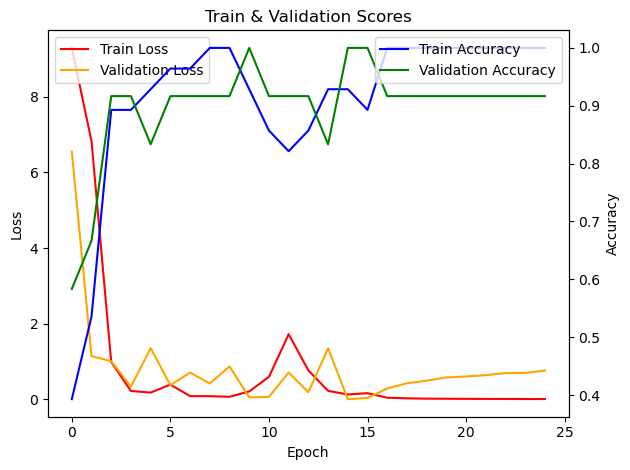

In [357]:
def grahp():
    fig, ax1 = plt.subplots()  # fig는 그래프 객체
    
    ax1.plot(ADAMLIST1, label='Train Loss', color='red')
    ax1.plot(ADAMLIST3, label='Validation Loss', color='orange')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.tick_params(axis='y')
    ax1.legend(loc='upper left')

    # 정확도 그래프 그리기
    ax2 = ax1.twinx()
    ax2.plot(ADAMLIST2, label='Train Accuracy', color='blue')
    ax2.plot(ADAMLIST4, label='Validation Accuracy', color='green')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.tick_params(axis='y')
    ax2.legend(loc='upper right')

    plt.xlabel('Epoch')  # 전체 그래프의 x축 라벨 설정
    plt.title('Train & Validation Scores')
    plt.tight_layout()
    plt.show()

grahp()

In [358]:
def predicting(dataLoader):
    model = Model1(IN_DIM, OUT_DIM).to(DEVICE)  # 모델 인스턴스화
    model.load_state_dict(torch.load("my_trained_model.pth"))
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for img, ytrue in dataLoader:
            img, ytrue = img.to(DEVICE), ytrue.to(DEVICE)
            ypre = model(img)  # 모델에 입력 데이터 전달
            ypre = torch.argmax(ypre, dim=1)
            
            correct += (ypre == ytrue).sum().item()
            total += ytrue.size(0)

    accuracy = correct / total
    print(f'Accuracy: {accuracy:.2f}, Correct: {correct}, Total: {total}')
    return accuracy

In [359]:
predicting(testDL)

Accuracy: 0.97, Correct: 39, Total: 40


0.975